In [1]:
import numpy as np
import maze as mz 
import problem_1 as pb1

# Problem 1: The Maze and the Random Minotaur

We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

In [3]:
# Create an environment maze
env = mz.Maze(maze)
print(env.transition_probabilities)

[[[0.   0.   0.   0.   0.  ]
  [0.25 0.25 0.   0.25 0.  ]
  [0.   0.   0.   0.   0.  ]
  ...
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]]

 [[0.   0.   0.   0.   0.  ]
  [0.25 0.25 0.   0.25 0.  ]
  [0.25 0.25 0.   0.25 0.  ]
  ...
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]]

 [[0.   0.   0.   0.   0.  ]
  [0.25 0.25 0.   0.25 0.  ]
  [0.25 0.25 0.   0.25 0.  ]
  ...
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]]

 ...

 [[0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  ...
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]]

 [[0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.  ]
  ...
  [0.   0.   0.   0.   0.  ]
  [1.   1.   1.   1.   1.  ]
  [0.   0.   0.   0.   0.  ]]

 [[1.   1.   1.   1.   1.  ]
  [0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0. 

In [4]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env, horizon)
print(policy)

[[0. 0. 0. ... 0. 0. 0.]
 [4. 4. 4. ... 4. 4. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
method = 'DynProg'
start = (0, 0, 6, 5)
start_state = env.map[start]
path = env.simulate(start, policy, method, horizon)

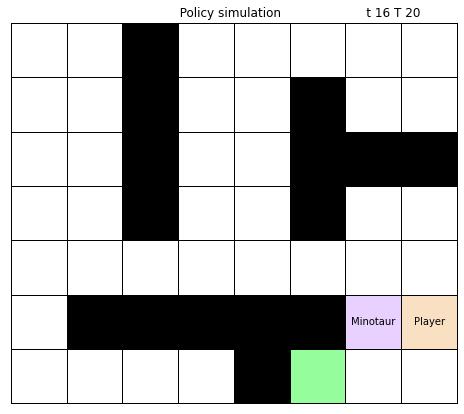

In [ ]:
mz.animate_solution(maze, path)

In [ ]:
env.draw_optimal_policy(maze, (6, 5), policy)

In [ ]:
prob, array = env.repeat_simulate(start, policy, 'DynProg', 100, 20)
print(prob)

In [ ]:
pb1.run()